In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd 
import numpy as np
from ucimlrepo import fetch_ucirepo

In [3]:
# fetch dataset 
mushroom = fetch_ucirepo(id=73)

# data (as pandas dataframes) 
X = mushroom.data.features 
y = mushroom.data.targets 
  
# metadata 
#print(mushroom.metadata) 
  
# variable information 
print(mushroom.variables) 

df=mushroom.data.original
df.head()

                        name     role         type demographic  \
0                  poisonous   Target  Categorical        None   
1                  cap-shape  Feature  Categorical        None   
2                cap-surface  Feature  Categorical        None   
3                  cap-color  Feature       Binary        None   
4                    bruises  Feature  Categorical        None   
5                       odor  Feature  Categorical        None   
6            gill-attachment  Feature  Categorical        None   
7               gill-spacing  Feature  Categorical        None   
8                  gill-size  Feature  Categorical        None   
9                 gill-color  Feature  Categorical        None   
10               stalk-shape  Feature  Categorical        None   
11                stalk-root  Feature  Categorical        None   
12  stalk-surface-above-ring  Feature  Categorical        None   
13  stalk-surface-below-ring  Feature  Categorical        None   
14    stal

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e


In [4]:
df.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat', 'poisonous'],
      dtype='object')

In [5]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(df['poisonous'])
encoded_data = label_encoder.transform(df['poisonous'])


for column in df.columns:
    df[column] = label_encoder.fit_transform(df[column])


In [6]:
test = [df.columns]
print(test)

[Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat', 'poisonous'],
      dtype='object')]


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [15]:
temp = df.drop('poisonous', axis=1, inplace=False)


Accuracy Score:
0.9901538461538462
AUC Score:
0.9899548864880936
Confusion Matrix:
[[839   4]
 [ 12 770]]


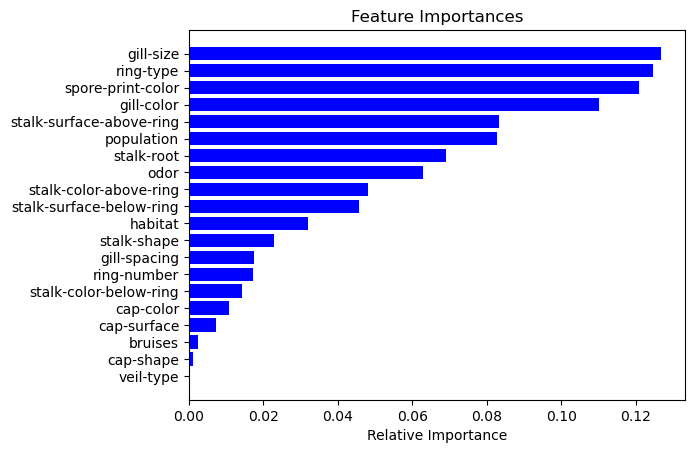

In [16]:
X = df[df.drop('poisonous', axis=1, inplace=False).columns]
y = df['poisonous']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# instantiate model


rf_model = RandomForestClassifier(
    random_state=1,
    max_depth=5,  # Adjust the maximum depth
    min_samples_split=2,  # Adjust the minimum samples required to split
    min_samples_leaf=1,  # Adjust the minimum samples required for a leaf
    max_features='sqrt',  # Use the square root of the number of features
    n_estimators=10  # Adjust the number of trees
)

rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

#fit model
rf_model.fit(X_train, y_train)

# make predictions 
y_pred = rf_model.predict(X_test)
y_pred

features = X.columns
importances = rf_model.feature_importances_


#print scores
print("")
print("Accuracy Score:")
print(metrics.accuracy_score(y_test, y_pred))
print("AUC Score:")
print(metrics.roc_auc_score(y_test, y_pred))
print("Confusion Matrix:")
print(metrics.confusion_matrix(y_test, y_pred))


import matplotlib.pyplot as plt
importances = rf_model.feature_importances_
indices = np.argsort(importances)[-20:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df[['gill-size','spore-print-color']]
y = df['poisonous']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# instantiate model
model = RandomForestClassifier(random_state=1, max_depth=10)

#fit model
model.fit(X_train, y_train)

# make predictions 
y_pred = model.predict(X_test)
y_pred

features = X.columns
print(features)
importances = model.feature_importances_
print(importances)

#print scores
print("")
print("Accuracy Score:")
print(metrics.accuracy_score(y_test, y_pred))
print("AUC Score:")
print(metrics.roc_auc_score(y_test, y_pred))
print("Confusion Matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

Index(['gill-size', 'spore-print-color'], dtype='object')
[0.42534752 0.57465248]

Accuracy Score:
0.9661538461538461
AUC Score:
0.9671470785436254
Confusion Matrix:
[[793  50]
 [  5 777]]


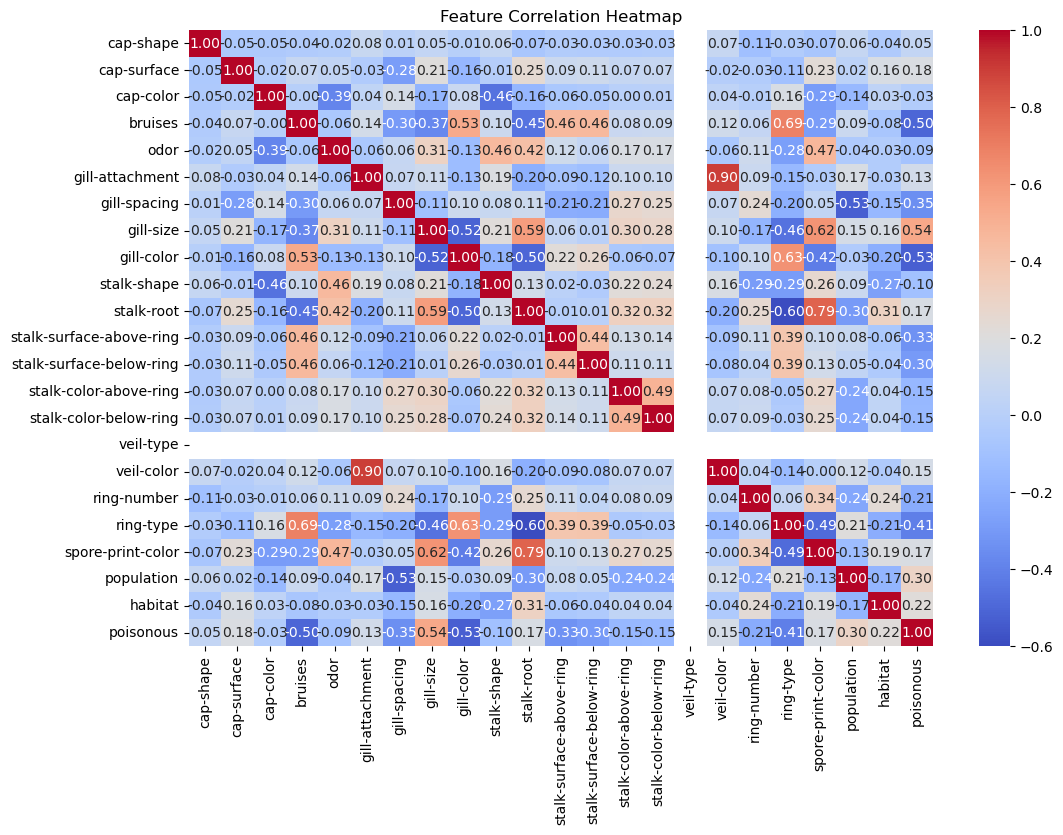

In [18]:
import seaborn as sns
correlation_matrix = df.corr()

# Create a heatmap to visualize correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()